In [9]:
import pandas as pd
df = pd.read_csv("C:/Users/User/Documents/retail.csv")
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


first transaction and last transsac
tion still not properly formated (in milisecond), we want convert it to second. 1 second is 1000 milisecond

In [10]:
#unit = s is second and origin is start with date
df['t']=pd.to_datetime(pd.to_datetime(df["First_Transaction"]/1000, unit='s',origin='1970-01-01'))
#extracc information using .dt
df['t']=df['t'].dt.date
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,t
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22,2016-06-19
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41,2014-07-23
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30,2017-04-28
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27,2017-04-28
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25,2015-04-16


**plot transaksi rata-rata setiap tanggalnya**

In [11]:
from matplotlib import pyplot as plt
sales_group=df.groupby('t')['Average_Transaction_Amount'].mean()
sales_group


t
2013-03-08    8.892083e+06
2013-03-11    3.142403e+06
2013-03-14    1.995735e+06
2013-03-26    6.454360e+05
2013-03-27    2.002187e+06
                  ...     
2019-01-28    1.269964e+06
2019-01-29    1.435771e+06
2019-01-30    1.538572e+06
2019-01-31    1.376141e+06
2019-02-01    1.344705e+06
Name: Average_Transaction_Amount, Length: 2102, dtype: float64

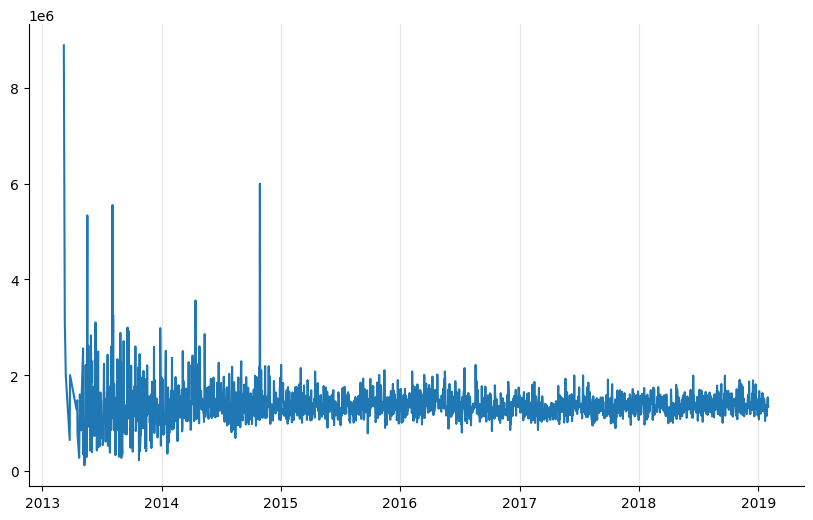

In [12]:
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(sales_group.index,sales_group)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x',alpha=0.3)

if we use ARIMA, we should check the stationary of the data because ARIMA assume the data should be stationary, we use dickey fuller model to check stationary

In [13]:
from statsmodels.tsa.stattools import adfuller
test=adfuller(sales_group)
print('p value : ',test[1])

p value :  0.0


    when p_value > 0.05 data is not statonary and when p_value <=0.5 data is stationary. in the dataset, data is stationary

**plot pacf and acf**: determine ARIMA p, d, and q

In [20]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
acf_val=acf(sales_group,nlags=20)
for i,j in enumerate(acf_val):
    print('lag :',i,"acf : ",j)


lag : 0 acf :  1.0
lag : 1 acf :  0.05864072038657375
lag : 2 acf :  0.05514921975000338
lag : 3 acf :  0.016897843490124537
lag : 4 acf :  0.003122181694014218
lag : 5 acf :  -0.015323020887039162
lag : 6 acf :  -0.018890600860658115
lag : 7 acf :  -0.0006299449373653174
lag : 8 acf :  -0.03958086237731384
lag : 9 acf :  -0.01983590818294901
lag : 10 acf :  0.012865550902666476
lag : 11 acf :  0.012628246137157989
lag : 12 acf :  0.033423637856862774
lag : 13 acf :  0.025813033184858808
lag : 14 acf :  -0.04619457985863584
lag : 15 acf :  0.004160584912152999
lag : 16 acf :  -0.001101689663387302
lag : 17 acf :  -0.008866573451047237
lag : 18 acf :  0.02550397165365616
lag : 19 acf :  0.04235701543263043
lag : 20 acf :  0.07953487128022468


In [21]:
pacf_val=pacf(sales_group,nlags=20)
for i,j in enumerate(pacf_val):
    print('lag :',i,"pacf : ",j)

lag : 0 pacf :  1.0
lag : 1 pacf :  0.05866863124825229
lag : 2 pacf :  0.05193850729670617
lag : 3 pacf :  0.01087107484062819
lag : 4 pacf :  -0.0012830621602489404
lag : 5 pacf :  -0.01703680739004289
lag : 6 pacf :  -0.017556714075002186
lag : 7 pacf :  0.0030885857752700144
lag : 8 pacf :  -0.037722905469622696
lag : 9 pacf :  -0.015364495971533386
lag : 10 pacf :  0.01885388783315017
lag : 11 pacf :  0.013466177412663908
lag : 12 pacf :  0.031190580043785252
lag : 13 pacf :  0.01978939590070639
lag : 14 pacf :  -0.05528503421453167
lag : 15 pacf :  0.0063913739332735735
lag : 16 pacf :  0.0024487906651387216
lag : 17 pacf :  -0.008441523680512538
lag : 18 pacf :  0.02980139978598832
lag : 19 pacf :  0.041758588388478755
lag : 20 pacf :  0.07517960642132526


based on above we can conclude that q=3 because lag 4 is near zero, we choose lag before lag value near zero. And p is 2 becaue lag 3 value near zero

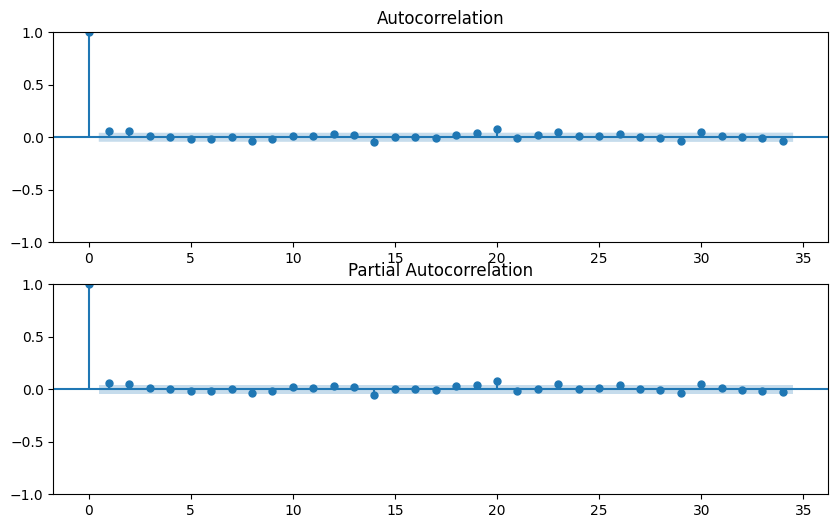

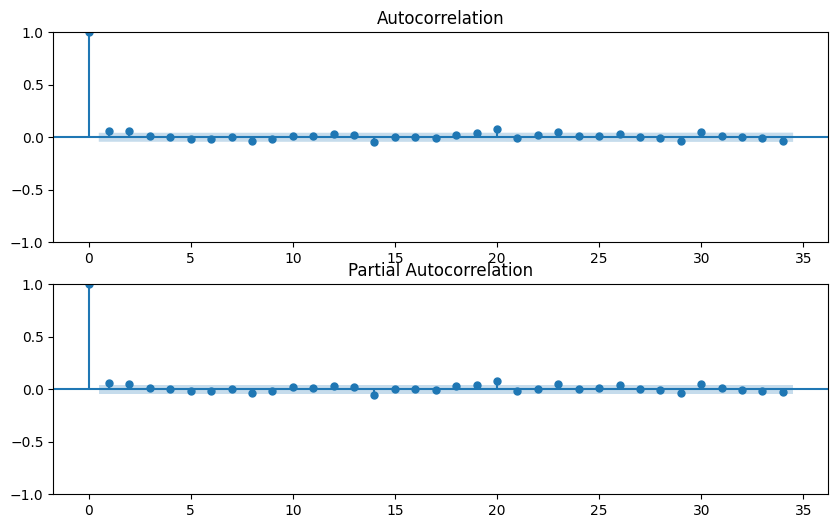

In [27]:
#plot acf : determine MA (or q value) measuere how time's now correlated with past data
# plot pacf : determine p values
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot as plt
fig,ax1=plt.subplots(2,1,figsize=(10,6))
plot_acf(sales_group,ax=ax1[0])
plot_pacf(sales_group,ax=ax1[1])


in the graph above, lag dont decline trend and we use auto regression (AR)

In [30]:
len(sales_group)*(80/100)

1681.6000000000001

In [119]:
#split test and train data (80 and 20)
size_train=round(len(sales_group)*(99/100))
size_test=len(sales_group)-size_train
import random 
train_data=sales_group.iloc[:size_train]
test_data=sales_group.iloc[size_train+1:].apply(lambda x: round(x,2))
test_data.index=[i for i in range(size_train,(size_train+size_test-1))]
test_data

2081    1415256.81
2082    1628385.73
2083    1460972.50
2084    1551633.93
2085    1366109.71
2086    1241939.70
2087    1500094.05
2088    1440179.45
2089    1345635.56
2090    1043466.14
2091    1375135.09
2092    1310372.49
2093    1340501.58
2094    1259930.52
2095    1153194.06
2096    1269964.00
2097    1435771.25
2098    1538571.91
2099    1376141.39
2100    1344704.53
Name: Average_Transaction_Amount, dtype: float64

In [126]:
from statsmodels.tsa.ar_model import AutoReg
ar_model=AutoReg(train_data,lags=20).fit()
print(ar_model.summary())


                                AutoReg Model Results                                 
Dep. Variable:     Average_Transaction_Amount   No. Observations:                 2081
Model:                            AutoReg(20)   Log Likelihood              -29214.896
Method:                       Conditional MLE   S.D. of innovations         346683.855
Date:                        Tue, 18 Feb 2025   AIC                          58473.791
Time:                                00:16:03   BIC                          58597.672
Sample:                                    20   HQIC                         58519.209
                                         2081                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           9.917e+05   1.21e+05      8.209      0.000    7.55e+05    1.23e+06
Average

C:\Users\User\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\User\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\User\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\User\AppData\Local\Temp\ipykernel_8896\3980048437.py:9: UserWarning: set_ticklabels

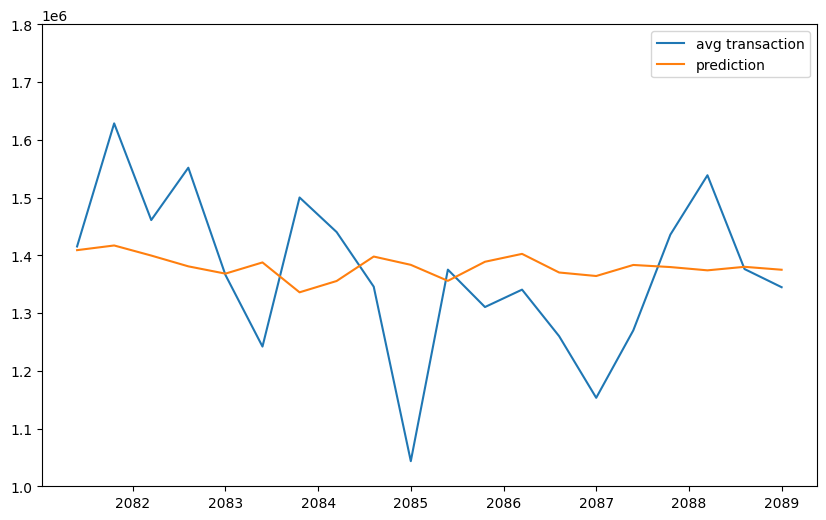

In [130]:
#mempredissi
#dynamic false - use real past data
pred=ar_model.predict(start=len(train_data), end=(len(train_data)+len(test_data)-1), dynamic=False)
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(test_data,label='avg transaction')
ax.plot(pred,label='prediction')
rentang=[i for i in range (len(train_data),(len(train_data)+len(test_data)),1)]
ax.set_xticklabels(rentang)
ax.set_ylim(1000000,1800000)
ax.legend()